# ** Flow for the titanic dataset work **
1. Loading and understanding the dataset
2. Perform Exploratory Data Analysis

   a. Univariant Analysis
   b. Bivariant Analysis
   3. Multivariant Analysis
   
3. feature Engineering

4. Model Prediction

# Loading and Understanding the dataset

In [108]:
import numpy as np #import numpy for number and arrays
import pandas as pd # import pandas for reading the csv file and handling dataframes
import matplotlib.pyplot as plt #import matplotlib for ploting graphs for dataset
import seaborn as sns #import seaborn for data visualization

In [109]:
train_df=pd.read_csv('DATA_OF_TITANIC")

In [110]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Univariant Analysis

<Axes: xlabel='Survived', ylabel='count'>

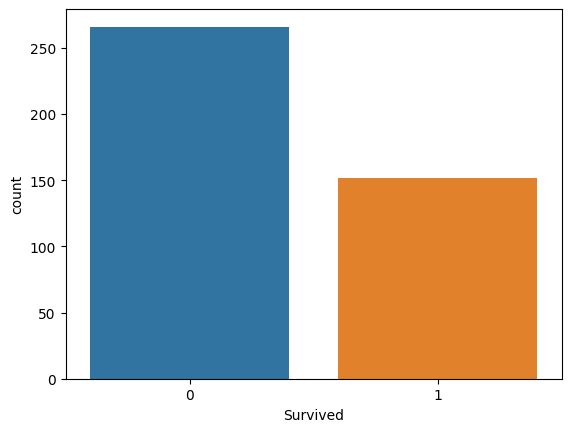

In [111]:
sns.countplot(x=train_df['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

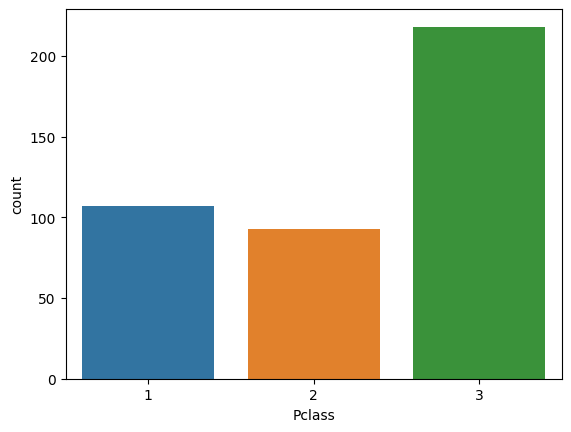

In [112]:
sns.countplot(x=train_df['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

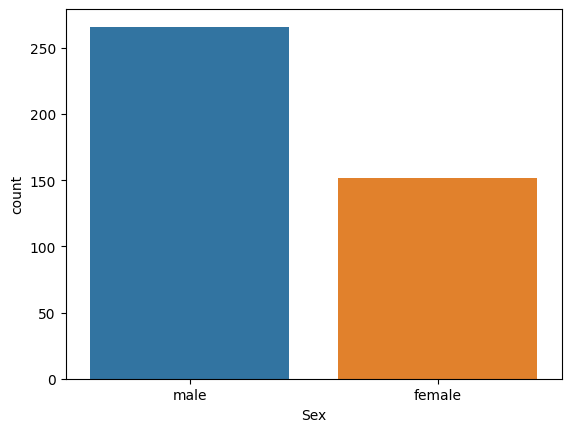

In [113]:
sns.countplot(x=train_df['Sex'])

<Axes: xlabel='Embarked', ylabel='count'>

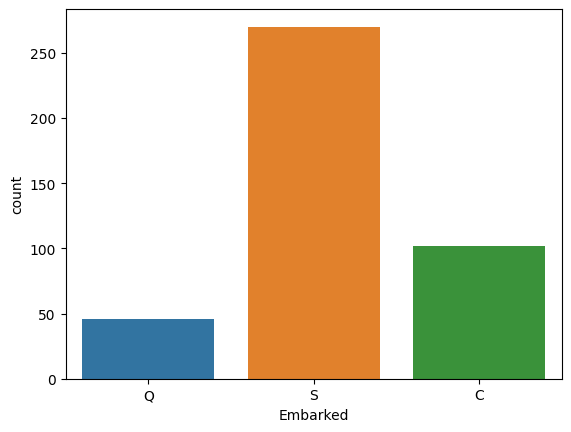

In [114]:
sns.countplot(x=train_df['Embarked'])

<Axes: xlabel='Age', ylabel='Density'>

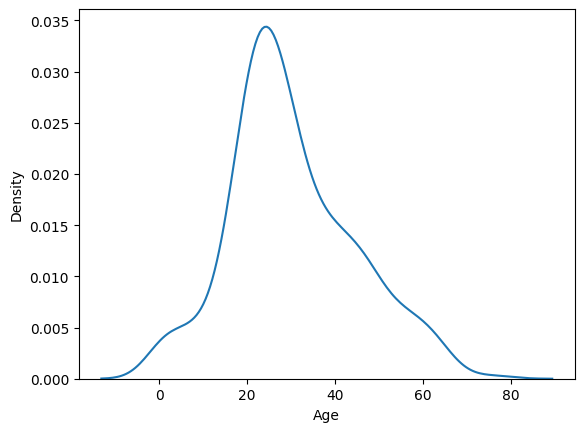

In [115]:
sns.kdeplot(train_df['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

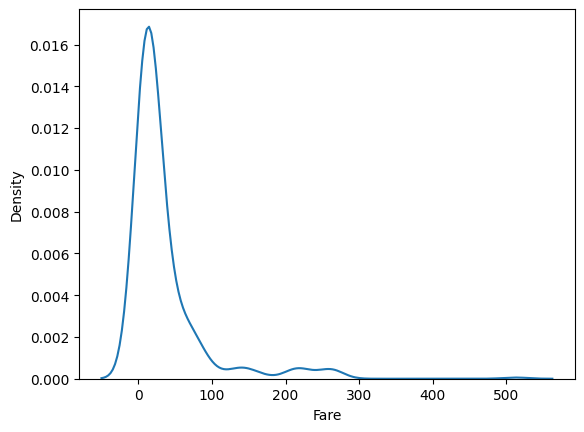

In [116]:
sns.kdeplot(train_df['Fare'])

In [117]:
#SibSp	Parch

<Axes: xlabel='SibSp', ylabel='count'>

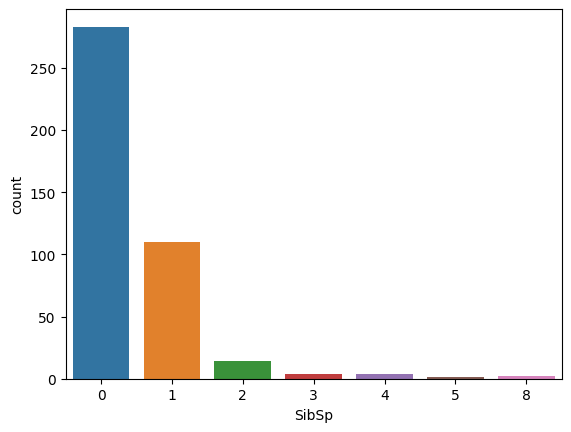

In [118]:
sns.countplot(x=train_df['SibSp'])

<Axes: xlabel='Parch', ylabel='count'>

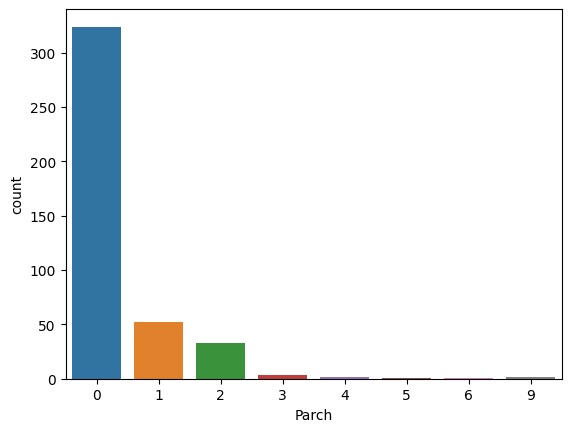

In [119]:
sns.countplot(x=train_df['Parch'])

In [120]:
train_df["Alone"] = ((train_df["Parch"] == 0) & (train_df["SibSp"] == 0)).astype(int)

In [121]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


<Axes: xlabel='Alone', ylabel='count'>

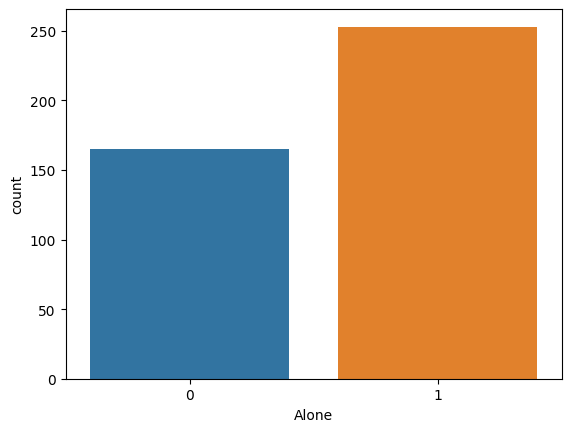

In [122]:
sns.countplot(x=train_df['Alone'])

<Axes: ylabel='Alone'>

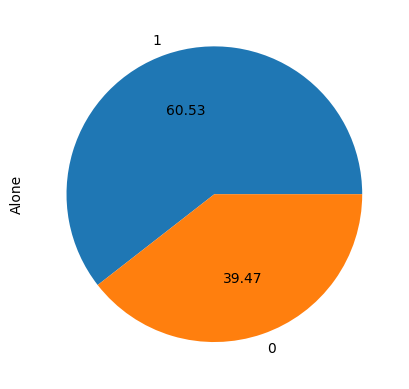

In [123]:
train_df['Alone'].value_counts().plot(kind='pie',autopct='%.2f')

# After doing Univariant analysis we know about few things about out dataset

1. the value of survived people is less and a lot of people is not survived.
2. the majority of people are of p class
3. there are more male travel in the titanic as compared to male.
4. a lot of people embraked from  south hempton
5. the age distribution is nearly normally distributed
6. fair is unequally distribute means very few travel with paying a lot of fare as compared to a majority of people travel with less fare.
7. a lot of people travel alone in this ship as compared to the family ones

There are lot of question that are uncovered let do the bivariant analysis for that.

# Bivariant Analysis of Data

<Axes: xlabel='Age', ylabel='Fare'>

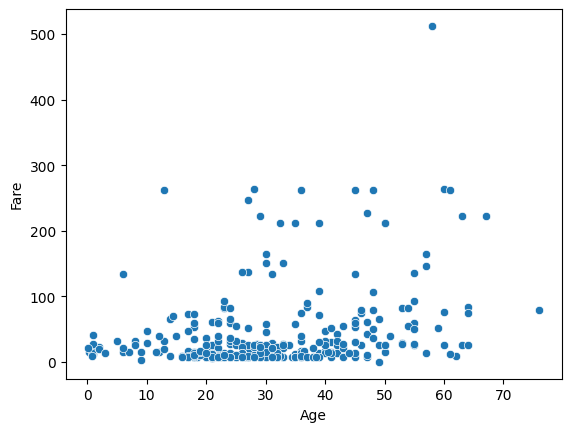

In [124]:
sns.scatterplot(y=train_df['Fare'],x=train_df['Age'])

<Axes: xlabel='Sex', ylabel='Age'>

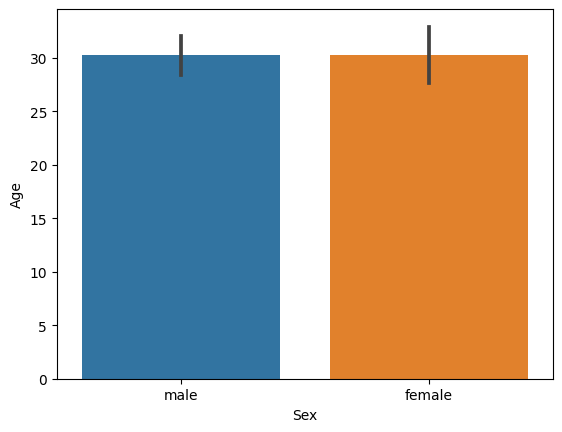

In [125]:
sns.barplot(x=train_df['Sex'],y=train_df['Age'])

<Axes: xlabel='Sex', ylabel='Fare'>

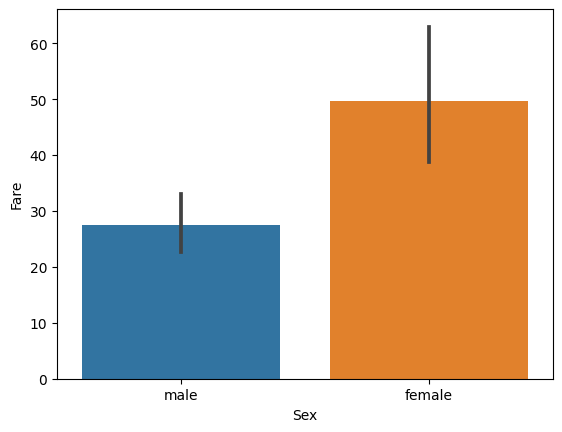

In [126]:
sns.barplot(x=train_df['Sex'],y=train_df['Fare'])

<Axes: xlabel='Sex', ylabel='Survived'>

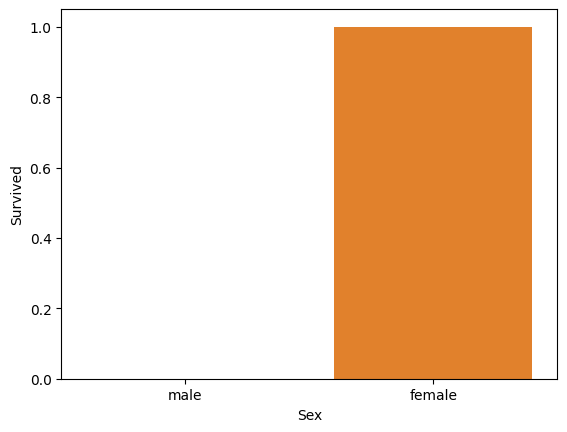

In [127]:
sns.barplot(x=train_df['Sex'],y=train_df['Survived'])

<Axes: xlabel='Embarked', ylabel='Age'>

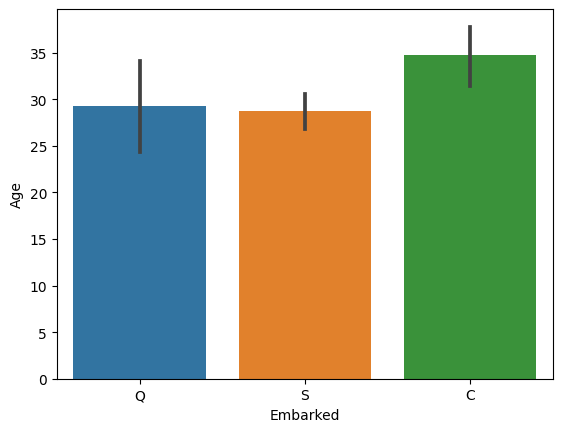

In [128]:
sns.barplot(x=train_df['Embarked'],y=train_df['Age'])

<Axes: xlabel='Embarked', ylabel='Fare'>

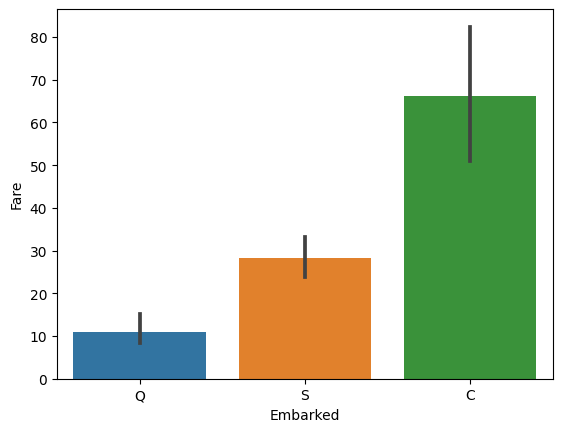

In [129]:
sns.barplot(x=train_df['Embarked'],y=train_df['Fare'])

<Axes: xlabel='Age', ylabel='Density'>

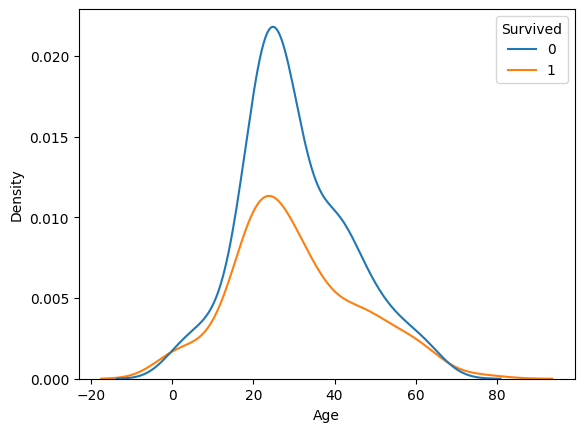

In [130]:
sns.kdeplot(data=train_df,x='Age',hue='Survived')


<Axes: xlabel='Fare', ylabel='Density'>

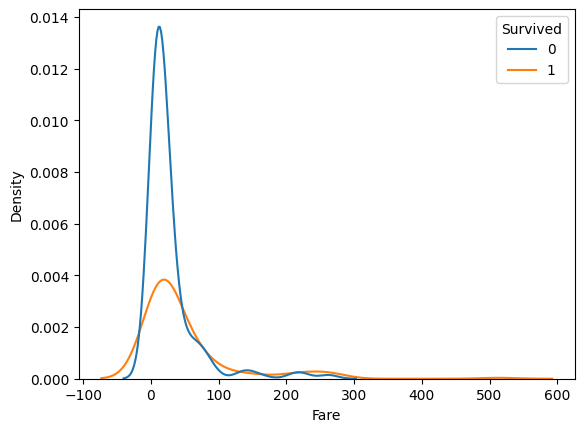

In [131]:
sns.kdeplot(data=train_df,x='Fare',hue='Survived')


<Axes: xlabel='Survived', ylabel='Sex'>

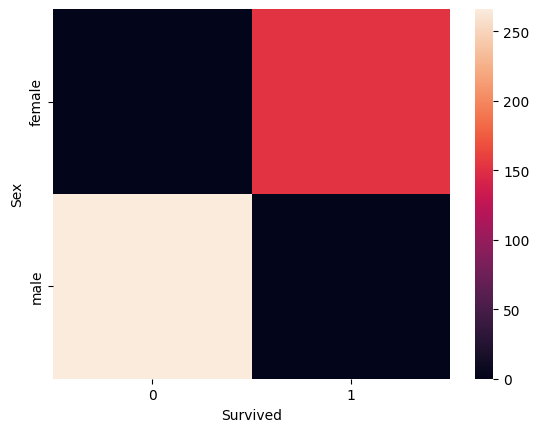

In [132]:
sns.heatmap(pd.crosstab(train_df['Sex'],train_df['Survived']))

<Axes: xlabel='Sex', ylabel='Pclass'>

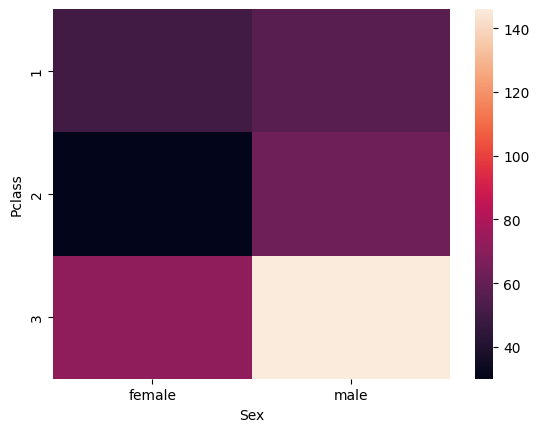

In [133]:
 sns.heatmap(pd.crosstab(train_df['Pclass'],train_df['Sex'],))

<Axes: xlabel='Sex', ylabel='Embarked'>

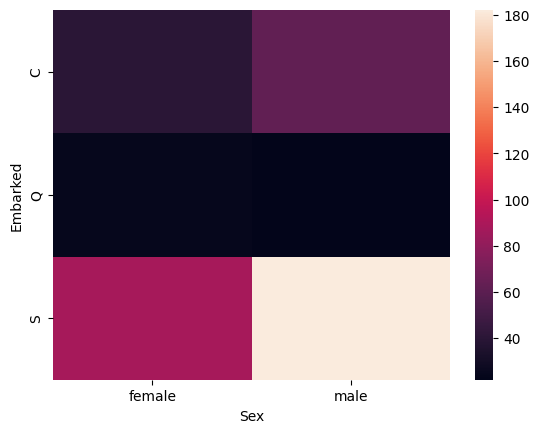

In [134]:
sns.heatmap(pd.crosstab(train_df['Embarked'],train_df['Sex'],))

# Multivariant Analysis

<Axes: xlabel='Age', ylabel='Fare'>

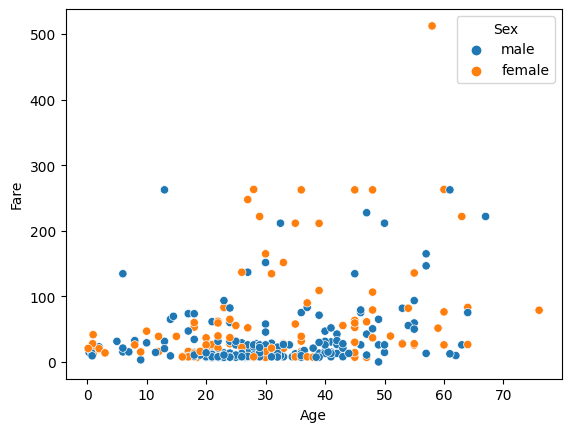

In [135]:
sns.scatterplot(data=train_df,x='Age',y='Fare',hue='Sex')

<Axes: xlabel='Sex', ylabel='Age'>

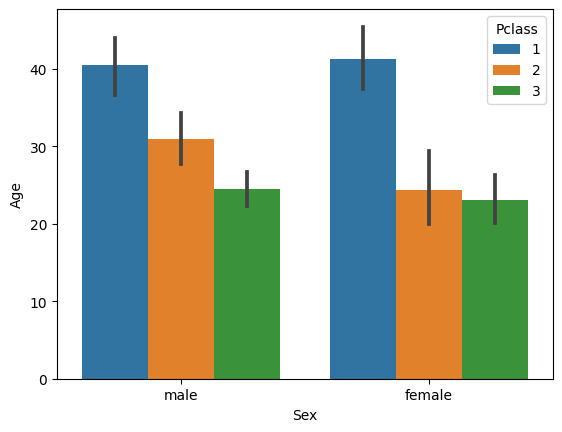

In [136]:
sns.barplot(x=train_df['Sex'],y=train_df['Age'],hue=train_df['Pclass'])

<Axes: xlabel='Embarked', ylabel='Fare'>

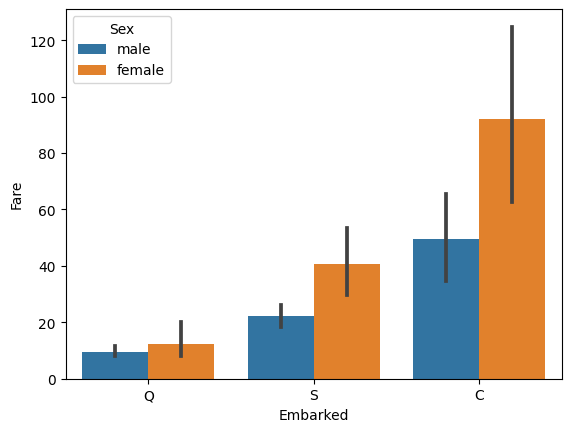

In [137]:
sns.barplot(x=train_df['Embarked'],y=train_df['Fare'],hue=train_df['Sex'])

<Axes: xlabel='Sex', ylabel='Fare'>

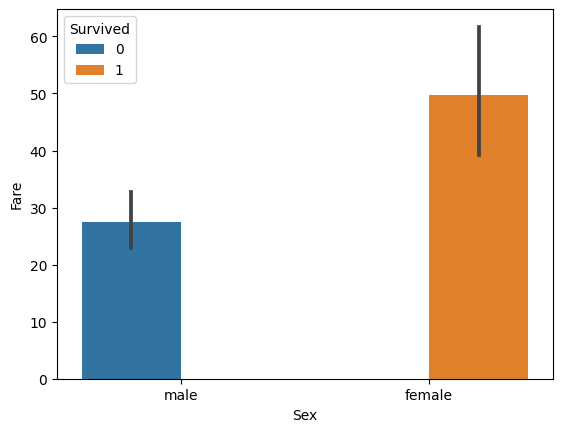

In [138]:
sns.barplot(data=train_df,x='Sex',y='Fare',hue='Survived')

In [139]:
# here we have 3 4 columns  that are helpful
# gender pclass fare age lets build our model but  before that we need to find null values

# Missing value and Null Value

In [140]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Alone            0
dtype: int64

In [141]:
# age and cabin are important but before that let remove unnesscary columns
train_df.drop(columns=['Name','SibSp','Parch','Ticket','Cabin'],inplace=True)

# Feature Engineering

In [142]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])

imputer = SimpleImputer(strategy='most_frequent')
train_df[['Embarked']] = imputer.fit_transform(train_df[['Embarked']])

## Fare is highly skewed right skewed and it is important so log transformation is applied

In [143]:
train_df['Fare'] = np.log1p(train_df['Fare'])


In [144]:
train_df['Sex'] = train_df['Sex'].replace(['male', 'female'], [0,1])

In [145]:
train_df['Embarked']=train_df['Embarked'].replace(['S','C','Q'],[3,4,5])

In [146]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,892,0,3,0,34.5,2.178064,5,1
1,893,1,3,1,47.0,2.079442,3,0
2,894,0,2,0,62.0,2.369075,5,1
3,895,0,3,0,27.0,2.268252,3,1
4,896,1,3,1,22.0,2.586824,3,0


In [147]:
train_df.drop(columns=['PassengerId'],inplace=True)

In [148]:
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,0,34.5,2.178064,5,1
1,1,3,1,47.0,2.079442,3,0
2,0,2,0,62.0,2.369075,5,1
3,0,3,0,27.0,2.268252,3,1
4,1,3,1,22.0,2.586824,3,0


In [158]:
from sklearn.model_selection import train_test_split
x = train_df.drop('Survived', axis=1)
y = train_df['Survived']
# x.isnull().sum()
x['Fare'].fillna(2.079442, inplace=True)


In [159]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Alone       0
dtype: int64

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [161]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [162]:
model.score(x_train, y_train)

1.0

In [163]:
model.score(x_test, y_test)

1.0